In [45]:
import torch
from torch import nn
from torch import nn


In [46]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [47]:
#device = 'mps'

In [48]:
import requests
import zipfile
from pathlib import Path
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

#If image folde doesn't  exist download it and prepare it

if image_path.is_dir():
    print (f"{image_path} directory already exist, skipping download")
else:
    print(f'{image_path} doesnt exist, creating one' )
    image_path.mkdir(parents=True, exist_ok=True)

#Making file and filling it with download content
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:  #Creating file pizza_steak_sushi || wb - write permission
    requests = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print ("Downloading")
    f.write(requests.content) #Writes dowloaded ti a file in with open string

 
#Unzip pizza steak sushi dataset
with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip', "r") as zip_ref:
    print("Unzipping")
    zip_ref.extractall(image_path)





data\pizza_steak_sushi directory already exist, skipping download


Downloading
Unzipping


In [49]:
image_path

WindowsPath('data/pizza_steak_sushi')

In [50]:
#Becoming one with data

import os 

def walk_through_dir(path):
    for dirpath, dirnames, filenames in os.walk(path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}")
        
        

In [51]:
walk_through_dir(image_path)

There are 2 directories and 0 files in data\pizza_steak_sushi
There are 3 directories and 0 files in data\pizza_steak_sushi\test
There are 0 directories and 25 files in data\pizza_steak_sushi\test\pizza
There are 0 directories and 19 files in data\pizza_steak_sushi\test\steak
There are 0 directories and 31 files in data\pizza_steak_sushi\test\sushi
There are 3 directories and 0 files in data\pizza_steak_sushi\train
There are 0 directories and 78 files in data\pizza_steak_sushi\train\pizza
There are 0 directories and 75 files in data\pizza_steak_sushi\train\steak
There are 0 directories and 72 files in data\pizza_steak_sushi\train\sushi


In [52]:
train_dir = image_path/"train"
test_dir = image_path/"test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [53]:
#Visualize the images
import random
from PIL import Image



# Get all images paths
# Pick a random image using random.choice()
# Get image class name using pathlib.Path.parent.stem
# Open image using PIL
# Show image metadata
image_path_list = list(image_path.glob('*/*/*.jpg'))
image_path_list


[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2236338.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2508636.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2871261.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/3092704.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/309892.jp

In [54]:
random_image_path = random.choice(image_path_list)
random_image_path
    

WindowsPath('data/pizza_steak_sushi/train/sushi/929471.jpg')

In [55]:
image_class = random_image_path.parent.stem
image_class

'sushi'

In [56]:
img = Image.open(random_image_path)

random image path: data\pizza_steak_sushi\train\sushi\929471.jpg
random_image class: sushi
image height: 512
image width: 511


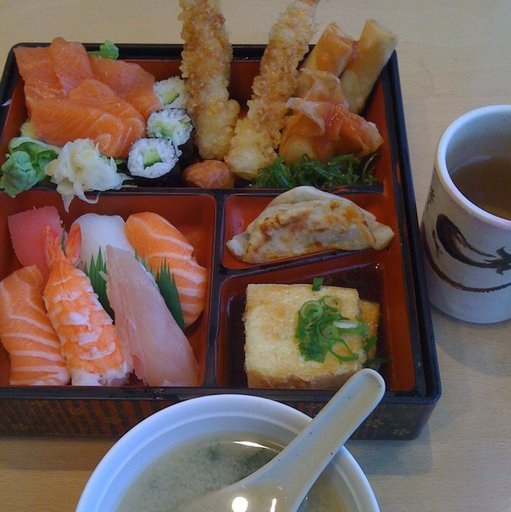

In [57]:
print(f'random image path: {random_image_path}')
print(f'random_image class: {image_class}')
print(f'image height: {img.height}')
print(f'image width: {img.width}')
img

(-0.5, 510.5, 511.5, -0.5)

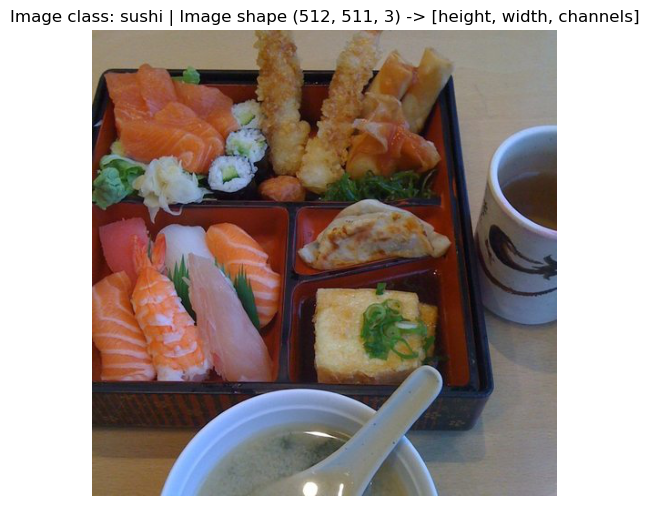

In [58]:
import numpy as np
import matplotlib.pyplot as plt
# Show image with matplotlib
image_as_array = np.asarray(img)

plt.figure(figsize=(6,8))
plt.imshow(image_as_array)
plt.title(f'Image class: {image_class} | Image shape {image_as_array.shape} -> [height, width, channels]')
plt.axis(False)

Turning images into Torch tensors format


turn images into torch.utils.data.Dataset and subsequently to torch.utils.data.DataLoader we'll call it Dataset and DataLoader



In [59]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


Transforming data with torchvision.transforms

In [60]:
data_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                     transforms.RandomHorizontalFlip(p=0.5),
                                     transforms.ToTensor()])

In [61]:
data_transform(img=img).shape

torch.Size([3, 64, 64])

In [62]:
data_transform(img)

tensor([[[0.5922, 0.6000, 0.6000,  ..., 0.5725, 0.5765, 0.5765],
         [0.5961, 0.6000, 0.6039,  ..., 0.5804, 0.5804, 0.5804],
         [0.6078, 0.6000, 0.6039,  ..., 0.5843, 0.5804, 0.5765],
         ...,
         [0.5176, 0.5176, 0.5176,  ..., 0.5412, 0.5451, 0.5529],
         [0.5176, 0.5137, 0.5176,  ..., 0.5451, 0.5490, 0.5608],
         [0.5137, 0.5098, 0.5098,  ..., 0.5490, 0.5608, 0.5686]],

        [[0.5412, 0.5412, 0.5490,  ..., 0.5804, 0.5882, 0.5961],
         [0.5490, 0.5490, 0.5529,  ..., 0.5882, 0.5922, 0.5961],
         [0.5490, 0.5529, 0.5490,  ..., 0.5882, 0.6000, 0.6000],
         ...,
         [0.4196, 0.4157, 0.4118,  ..., 0.5294, 0.5333, 0.5373],
         [0.4157, 0.4118, 0.4118,  ..., 0.5333, 0.5451, 0.5608],
         [0.4118, 0.4078, 0.4078,  ..., 0.5373, 0.5529, 0.5686]],

        [[0.4353, 0.4706, 0.4784,  ..., 0.5490, 0.5725, 0.6000],
         [0.4627, 0.4706, 0.4784,  ..., 0.5647, 0.5843, 0.5961],
         [0.4588, 0.4627, 0.4627,  ..., 0.5686, 0.5882, 0.

Visualising transfored image

In [63]:
def plot_transformed_images(image_paths:list, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].axis(False)
            ax[0].set_title(f'Original\nSize: {f.size}')

            #Transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0) #changing shape for matplotlib (C, H, W) -> (H, W, C)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f'Transformed\nSize: {transformed_image.shape}')
            ax[1].axis(False)

            fig.suptitle(f'Class: {image_path.parent.stem}', fontsize=16)



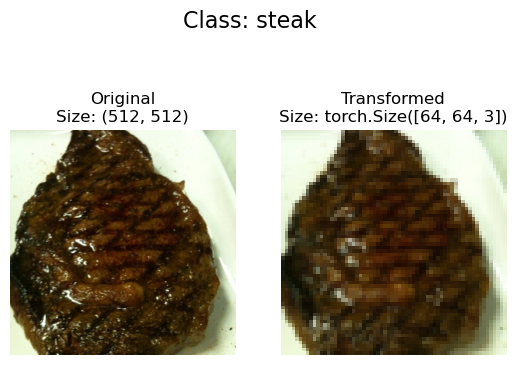

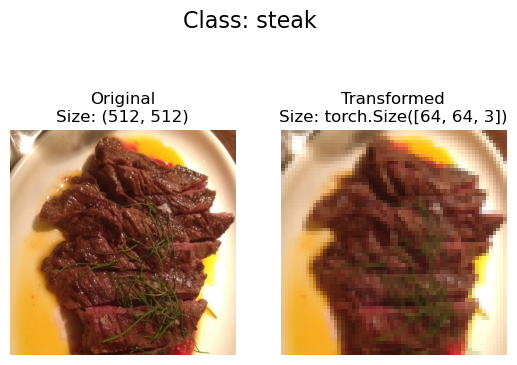

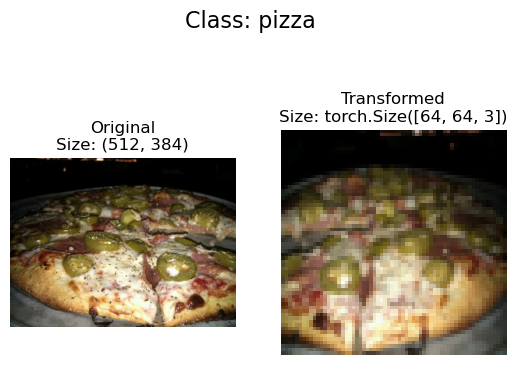

In [64]:
plot_transformed_images(image_paths=image_path_list, transform=data_transform,
                        n=3, seed=46)

Loding images data using ImageFolder

In [65]:
from torchvision import datasets

In [66]:
# Use ImageFolder to create datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, #transform for data
                                  target_transform=None)  #transform for target


test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform) #transform for data
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [67]:
# Getting class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [68]:
#Get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [69]:
len(train_data), len(test_data)

(225, 75)

In [70]:
train_data.samples[0]

('data\\pizza_steak_sushi\\train\\pizza\\1008844.jpg', 0)

In [71]:
# Index on tran_data Dataset ti get single image and label
img, label = train_data[0][0], train_data[0][1]
print (f'Image tenor:\n {img}')
print (f'image shape {img.shape}')
print (f'Image datatype {img.dtype}')
print (f'Image label {label}')
print (f'Label datatype {type(label)}')



Image tenor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

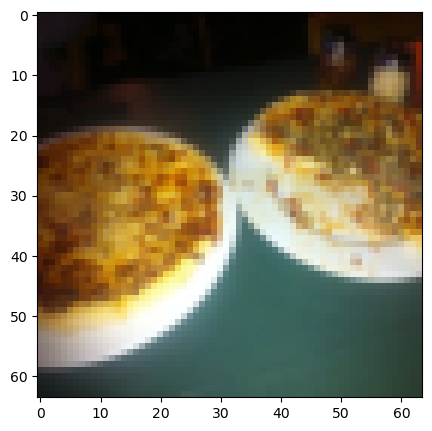

In [72]:
#Changing colorchannels  to see image in matplotlib

permuted_image = img.permute(1,2,0)

plt.figure(figsize=(5,5))
plt.imshow(permuted_image)


Making a DataLoader from Dataset. It makes images iterable and set a batchsize

In [73]:
# Turn train and test datasets into Dataloader

In [74]:
import os
os.cpu_count()

16

In [75]:
from torch.utils.data import DataLoader

BATCH_SIZE = 1

train_data_loader = DataLoader(dataset=train_data,
                               batch_size=BATCH_SIZE,
                               num_workers=os.cpu_count(),
                               shuffle=True)
test_data_loader = DataLoader(dataset=test_data,
                               batch_size=BATCH_SIZE,
                               num_workers=os.cpu_count(),
                               shuffle=False)  

In [76]:
train_data_loader, test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x271f5a96d10>,
 <torch.utils.data.dataloader.DataLoader at 0x271f14a5ad0>)

In [77]:
len(train_data_loader), len(test_data_loader)

(225, 75)

In [78]:
img, label = next(iter(train_data_loader))
print (f'Image shape: {img.shape} -> batch_size, color_channels, height, width')
print (f'Label shape: {label.shape}')

Image shape: torch.Size([1, 3, 64, 64]) -> batch_size, color_channels, height, width
Label shape: torch.Size([1])


MAKING DATASEST WITHOUT IMAGE_Folder CLASS and UseIt with DataLoader

Replicating Image_folder Class

In [79]:
# Want to load images from file
# Want to be able to get class names from Dataset
# Want to be able to get classes as dictionary from the Dataset
 

HAVENT DONE ONLY WATCHED IF YOU NEED WATCH IT

----------------------------------------------------------
Data Augmentation
----------------------------------------------------------


In [80]:
from torchvision import transforms

In [81]:
train_transforms = transforms.Compose([transforms.Resize(size=(224, 224)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                      transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(size=(224, 224)),
                                      transforms.ToTensor()])

In [82]:
#GEt all image paths
image_path_list = list(image_path.glob('*/*/*.jpg'))
image_path_list[:5]

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg')]

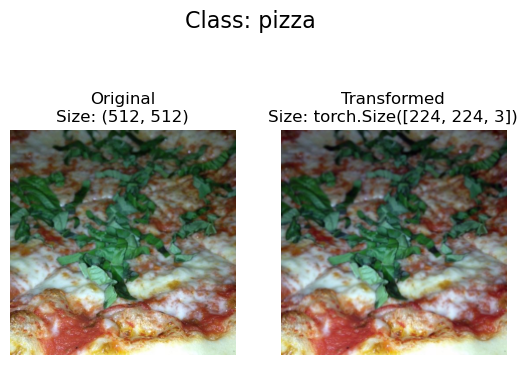

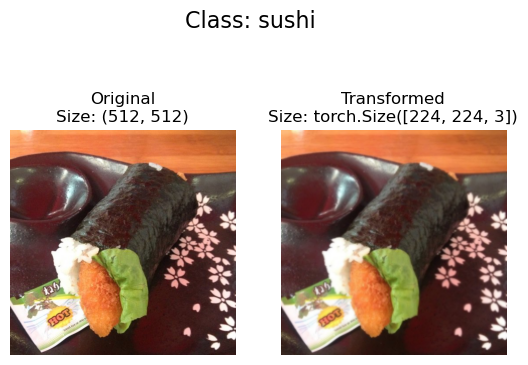

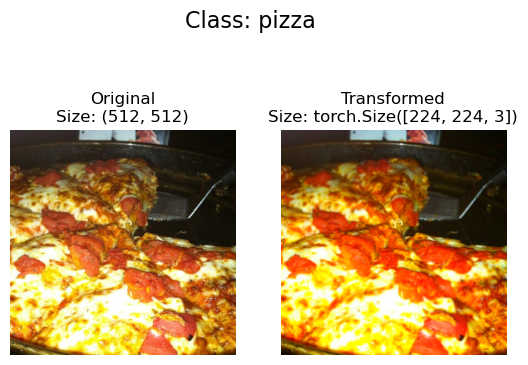

In [83]:
plot_transformed_images(image_paths=image_path_list,
                        transform=train_transforms,
                        n=3,
                        seed=None)

Model 0: Making test with TINY VGG without data augmentation from CNN Explainew Web Site

In [84]:
#Creating transforms and loading data for model_0

simple_transform = transforms.Compose([transforms.Resize(size=(64,64)),
                                       transforms.ToTensor()])

In [85]:
#Load and transform data
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

# Turan the dataset into DataLoaders
import os
from torch.utils.data import DataLoader

#Setup batch size and number of works
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

#Create DataLoader

train_data_loader_simple = DataLoader(dataset=train_data_simple,
                               batch_size=BATCH_SIZE,
                               num_workers=NUM_WORKERS,
                               shuffle=True)

test_data_loader_simple = DataLoader(dataset=test_data_simple,
                               batch_size=BATCH_SIZE,
                               num_workers=NUM_WORKERS,
                               shuffle=False)

In [130]:
#MAking TinyVgg model Class
from torch import nn

class TinyVGG(nn.Module):
    '''Model architecture from CNN Explainer'''

    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int)-> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) #For MaxPool default stride is same as kernel_size
            

        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) #For MaxPool default stride is same as kernel_size
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*13*13, #Got 13*13 from first lainch error RuntimeError: linear(): input and weight.T shapes cannot be multiplied (32x1690 and 10x3)
                      out_features=output_shape)
                      
            )




    def forward(self, x):
        x = self.conv_block_1(x)
        #print(x.shape)
        x = self.conv_block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x
    #   Alternative and faster (FUSION operator)return self.classifier(self.conv_block_2(self.conv_block_1(x)))




         
         


In [87]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0 

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [88]:
### Try a forward pass of single image to test a model and to know output features

image_batch, label_batch = next(iter(train_data_loader_simple))
image_batch.shape, label_batch.shape
                                

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [89]:
#Try forward path
model_0(image_batch.to(device))

torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])


tensor([[ 2.0789e-02, -1.9350e-03,  9.5317e-03],
        [ 1.8427e-02,  2.4670e-03,  6.6757e-03],
        [ 1.7699e-02,  1.0262e-03,  9.4657e-03],
        [ 2.4441e-02, -3.3526e-03,  9.6011e-03],
        [ 1.9930e-02,  6.6316e-04,  1.0779e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0047e-03],
        [ 2.0999e-02,  1.2869e-04,  1.2473e-02],
        [ 2.1577e-02, -1.9507e-03,  9.6941e-03],
        [ 2.4504e-02, -4.7745e-03,  8.5280e-03],
        [ 2.0252e-02, -4.7292e-04,  1.0908e-02],
        [ 2.2215e-02, -4.1838e-04,  9.8123e-03],
        [ 2.2313e-02, -2.1622e-03,  9.4455e-03],
        [ 2.1841e-02, -3.7132e-03,  8.3783e-03],
        [ 2.2863e-02, -1.7724e-03,  1.0287e-02],
        [ 2.1647e-02, -4.4139e-03,  9.5021e-03],
        [ 2.2096e-02, -4.1426e-03,  9.3853e-03],
        [ 2.1209e-02, -4.4219e-03,  1.1475e-02],
        [ 2.1711e-02, -2.7656e-03,  8.5006e-03],
        [ 1.9951e-02,  2.8272e-05,  8.4380e-03],
        [ 1.8298e-02,  1.6306e-03,  8.5499e-03],
        [ 2.0768e-02

Using torchinfo for checking shapes

In [91]:
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) 

torch.Size([1, 10, 30, 30])
torch.Size([1, 10, 13, 13])
torch.Size([1, 3])


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

Creating trainig and test loops fo ANY model and dataloader

In [ ]:
# train_step() takes a model  and dataloader and trains the model on the dataloader
# test_step() takes a model  and dataloader and evaluates the model on the dataloader

In [99]:
import torch.utils.data.dataloader

In [123]:
def train_step(model: torch.nn.Module,
               dataloader:torch.utils.data.dataloader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
    model.train()

    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

        #Averiging metrics to average fo the epoch

        train_loss = train_loss/len(dataloader)
        train_acc = train_acc/len(dataloader)

        return train_loss, train_acc






In [124]:
#Create a test step 
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.dataloader,
              loss_fn: torch.nn.Module,
              device=device):
    
    model.eval()

    test_loss, test_acc = 0, 0      

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            test_pred_logits = model(X)

            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum()).item()/len(test_pred_labels)

    test_loss = test_loss/len(dataloader)
    test_acc = test_acc/len(dataloader)

    return test_loss, test_acc



In [128]:
# Making training functions
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):
    
    #Create dict for results
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}
    

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)
        print(f"Epoch: {epoch} | Train_loss: {train_loss:.4f}, Train_acc: {train_acc:.4f}, Test_loss: {test_loss:.4f}, Test_acc: {test_acc:.4f}")
        

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results
          

In [134]:

torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5

model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

from timeit import default_timer as timer
start_time = timer()

model_0_results = train(model=model_0,
                        train_dataloader=train_data_loader_simple,
                        test_dataloader=test_data_loader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

stop_time = timer()

print (f"Training time: {stop_time - start_time:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train_loss: 0.1370, Train_acc: 0.0586, Test_loss: 1.1103, Test_acc: 0.2604
Epoch: 1 | Train_loss: 0.1366, Train_acc: 0.0469, Test_loss: 1.1360, Test_acc: 0.2604
Epoch: 2 | Train_loss: 0.1389, Train_acc: 0.0391, Test_loss: 1.1421, Test_acc: 0.2604
Epoch: 3 | Train_loss: 0.1346, Train_acc: 0.0508, Test_loss: 1.1564, Test_acc: 0.2604
Epoch: 4 | Train_loss: 0.1399, Train_acc: 0.0312, Test_loss: 1.1608, Test_acc: 0.2604
Training time: 75.459


In [133]:
device

'cuda'

In [ ]:
23:48

In [ ]:
КУДА НЕ РАБОТАЕТ СУКА